In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plotly package : iplot
from plotly.offline import iplot,init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [3]:
covid19=pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/covid_19_world.csv')

In [5]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
#Data Manipulation : Date and time part

In [6]:
#Type caste date, Its normal string #Date time formating

In [6]:
covid19['ObservationDate']=pd.to_datetime(covid19['ObservationDate'])

In [7]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
# Date wise analysis

In [9]:
covid_datewise=covid19.groupby('ObservationDate').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

In [10]:
covid_datewise.head() # Forecasting # Confirmed =X deaths =y 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [11]:
#No of active cases column
covid_datewise['Active']=covid_datewise['Confirmed']-covid_datewise['Deaths']-covid_datewise['Recovered']

In [12]:
covid_datewise.head()

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,510.0
2020-01-23,653.0,18.0,30.0,605.0
2020-01-24,941.0,26.0,36.0,879.0
2020-01-25,1438.0,42.0,39.0,1357.0
2020-01-26,2118.0,56.0,52.0,2010.0


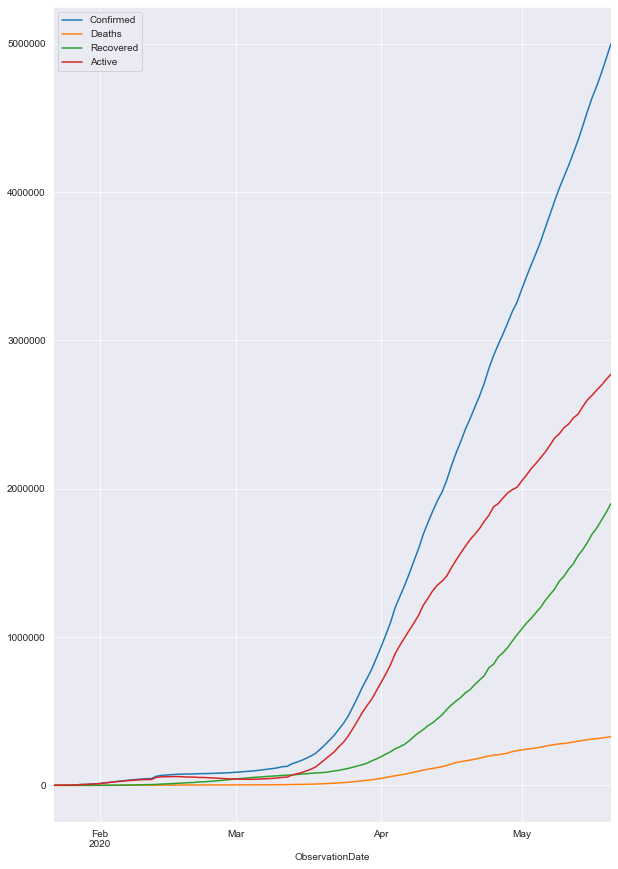

In [13]:
sns.set_style('darkgrid')
covid_datewise.plot(figsize=(10,15))

In [19]:
covid_datewise.iplot()


In [20]:
# It's line graph. Spend some time on plotly

In [21]:
# Bar plot

In [22]:
import plotly.express as px


fig = px.bar(covid_datewise, x=covid_datewise.index,y='Confirmed', height=800,width=1000,color='Confirmed')
fig.show()

In [26]:
#Mortality rate

In [27]:
covid_datewise['Mortality Rate']=(covid_datewise['Deaths']/covid_datewise['Confirmed'])*100

In [28]:
covid_datewise['Recovery Rate']=(covid_datewise['Recovered']/covid_datewise['Confirmed'])*100

In [29]:
covid_datewise['Mortality Rate'].iplot()

In [30]:
covid_datewise['Recovery Rate'].iplot()

In [31]:
# Predictions for Covid

In [34]:
#fbprophet
!pip install fbprophet

^C


In [40]:
#Days for linear regression
# Fetching number of days using dt.days
covid_datewise['Days']=covid_datewise.index-covid_datewise.index[0]
covid_datewise.head()

,Confirmed,Deaths,Recovered,Active,Mortality Rate,Recovery Rate,Days
ObservationDate,,,,,,,
2020-01-22,555.0,17.0,28.0,510.0,3.063063,5.045045,0 days
2020-01-23,653.0,18.0,30.0,605.0,2.756508,4.594181,1 days
2020-01-24,941.0,26.0,36.0,879.0,2.763018,3.825717,2 days
2020-01-25,1438.0,42.0,39.0,1357.0,2.920723,2.712100,3 days
2020-01-26,2118.0,56.0,52.0,2010.0,2.644004,2.455146,4 days


In [41]:
covid_datewise['Days']=covid_datewise['Days'].dt.days # We will remove the days part 

In [43]:
covid_datewise.head()

,Confirmed,Deaths,Recovered,Active,Mortality Rate,Recovery Rate,Days
ObservationDate,,,,,,,
2020-01-22,555.0,17.0,28.0,510.0,3.063063,5.045045,0
2020-01-23,653.0,18.0,30.0,605.0,2.756508,4.594181,1
2020-01-24,941.0,26.0,36.0,879.0,2.763018,3.825717,2
2020-01-25,1438.0,42.0,39.0,1357.0,2.920723,2.712100,3
2020-01-26,2118.0,56.0,52.0,2010.0,2.644004,2.455146,4


In [44]:
# We take 90% of days for training and 10% for analysis
train_ml=covid_datewise.iloc[:int(covid_datewise.shape[0]*.9)]

In [45]:
train_ml.head()

,Confirmed,Deaths,Recovered,Active,Mortality Rate,Recovery Rate,Days
ObservationDate,,,,,,,
2020-01-22,555.0,17.0,28.0,510.0,3.063063,5.045045,0
2020-01-23,653.0,18.0,30.0,605.0,2.756508,4.594181,1
2020-01-24,941.0,26.0,36.0,879.0,2.763018,3.825717,2
2020-01-25,1438.0,42.0,39.0,1357.0,2.920723,2.712100,3
2020-01-26,2118.0,56.0,52.0,2010.0,2.644004,2.455146,4


In [46]:
test_ml=covid_datewise.iloc[int(covid_datewise.shape[0]*.9):]

In [47]:
# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lin_reg=LinearRegression(normalize=True)

In [50]:
X=np.array(train_ml['Days']).reshape(-1,1) # Because we to convert 2d 

In [52]:
X[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]], dtype=int64)

In [53]:
y=np.array(train_ml['Confirmed']).reshape(-1,1) # Confirmed cases

In [54]:
y[:5]

array([[ 555.],
       [ 653.],
       [ 941.],
       [1438.],
       [2118.]])

In [56]:
X_test=np.array(test_ml['Days']).reshape(-1,1)

In [55]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [57]:
pred=lin_reg.predict(X_test)

In [58]:
pred[:5]

array([[2833167.99151956],
       [2867641.60570306],
       [2902115.21988657],
       [2936588.83407007],
       [2971062.44825358]])

In [59]:
predicted_all=lin_reg.predict(np.array(covid_datewise['Days']).reshape(-1,1))

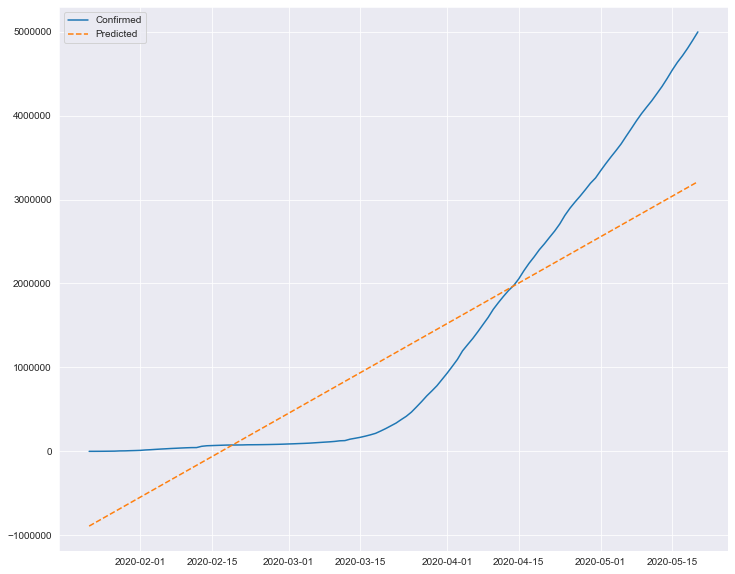

In [62]:
plt.figure(figsize=(12,10))
plt.plot(covid_datewise['Confirmed'],label='Confirmed')
plt.plot(covid_datewise.index,predicted_all,label='Predicted',linestyle="--")
plt.legend()
plt.show()


In [66]:
# We can see linear regression is not giving better results

In [68]:
#LSTM : Better version of RNN

In [69]:
# Neural Network with memory

In [70]:
from keras.models import Sequential

In [72]:
from keras.layers import LSTM, Dense, RNN
from keras.layers import  Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [73]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [74]:
data=covid19[covid19['Country/Region']=='India']

In [75]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,2020-01-30,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,2020-01-31,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,2020-02-01,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,2020-02-02,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,2020-02-03,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [76]:
# Filter  only observation date and confirmed cases


In [77]:
data=data.loc[:,['ObservationDate','Confirmed']]

In [78]:
data.head()

,ObservationDate,Confirmed
430,2020-01-30,1.0
491,2020-01-31,1.0
547,2020-02-01,1.0
607,2020-02-02,2.0
672,2020-02-03,3.0


In [79]:
data=data.groupby('ObservationDate')[['Confirmed']].max().reset_index()

In [80]:
data.head()

,ObservationDate,Confirmed
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0


In [81]:
dataset=data.drop('ObservationDate',axis=1)

In [82]:
dataset.head()  # Confirmed 

,Confirmed
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0


In [83]:
dataset=np.array(dataset).reshape(-1,1)

In [84]:
dataset[:5]

array([[1.],
       [1.],
       [1.],
       [2.],
       [3.]])

In [85]:
train_data=dataset[:len(dataset)-5]
test_data=dataset[len(dataset)-5:]

In [87]:
scaler=MinMaxScaler()
scaler.fit(train_data)
scaled_train_data=scaler.transform(train_data)
scaled_test_data=scaler.transform(test_data)